## Inspect results

In [6]:
b = '/Users/nicholassofroniew/Documents/DATA-proteins/proteins'

In [7]:
from pandas import read_csv
from os.path import join
import matplotlib.pyplot as plt
from glob import glob
from pandas import DataFrame
%matplotlib inline

In [44]:
results = read_csv(join(b,'models-lstm3D-2/model-0030','results.csv'))

In [45]:
results

,Unnamed: 0,bond_angle,rmse,torsion_angle
0,0,58.796660,15.950029,38.571368
1,1,58.911181,15.881986,38.210206
2,2,59.043059,15.796131,38.568944
3,3,58.936807,15.713507,38.083870
4,4,58.938754,15.775634,38.246846
5,5,59.296983,16.160218,40.238959
6,6,59.323594,16.052658,38.023875
7,7,58.910301,15.677311,38.538183
8,8,58.953742,15.832274,38.400649
9,9,58.946029,22.722075,42.973104


In [46]:
results.mean()

Unnamed: 0       609.500000
bond_angle        58.790658
rmse              25.669832
torsion_angle     47.992056
dtype: float64

In [62]:
train = read_csv(join(b,'models-lstm3D-2','train.csv'))
val =  read_csv(join(b,'models-lstm3D-2','val.csv'))

In [63]:
train = train[39156:]

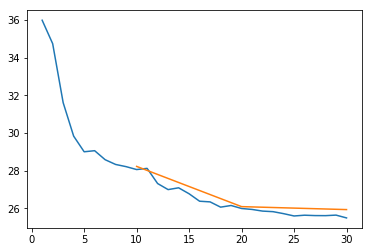

In [64]:
plt.plot(train.groupby('epoch').mean().loss);
plt.plot(val.groupby('epoch').mean().loss);

### look at ramachandran plots for predicted

In [37]:
files = glob(join(b,'val','*.csv'))
dfVal = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfVal = dfVal.append(df)
    ind = ind + 1

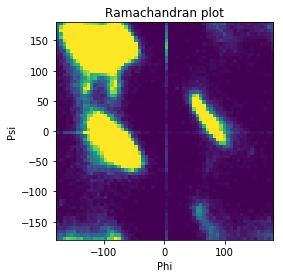

In [38]:
from numpy import histogram2d
heatmap, xedges, yedges = histogram2d(-dfVal.torsion_angle[2::3], dfVal.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.clf()
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.show()

In [65]:
files = glob(join(b,'models-lstm3D-2/model-0030','predict*.csv'))
dfPred = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfPred = dfPred.append(df)
    ind = ind + 1

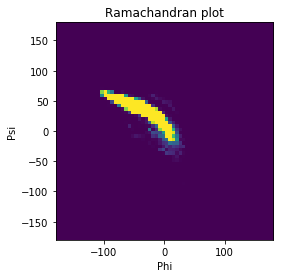

In [66]:
from numpy import histogram2d
heatmap, xedges, yedges = histogram2d(-dfPred.torsion_angle[2::3], dfPred.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.clf()
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.show()

## 3D plots

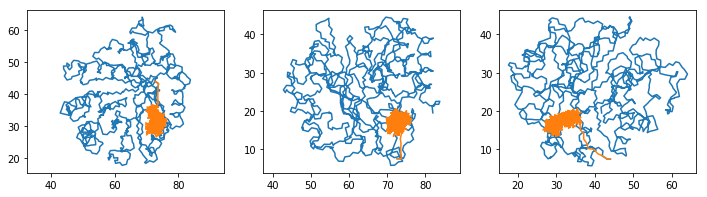

In [67]:
protein_id = 10

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].y);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].y);
plt.axis('equal')
plt.subplot(132)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].z);
plt.axis('equal')
plt.subplot(133)
plt.plot(dfVal[dfPred.id==protein_id].y, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].y, dfPred[dfPred.id==protein_id].z);
plt.axis('equal');

In [68]:
dfPred[dfPred.id==protein_id]

,Unnamed: 0,bond_angle,torsion_angle,x,y,z,id
0,0,-175.304810,173.464370,72.586000,44.090000,7.476000,10
1,1,-166.004490,4.128928,73.748000,43.226000,7.485000,10
2,2,-167.970170,-35.855198,73.574000,41.978000,8.345000,10
3,3,154.760000,151.645970,73.574875,40.768063,8.896005,10
4,4,-139.233060,-1.370554,73.521000,39.824112,10.006562,10
5,5,-114.181650,-6.908334,73.534180,38.317177,10.243759,10
6,6,157.955720,152.778820,73.604220,37.968090,11.524666,10
7,7,-140.363590,-3.590401,73.418590,37.143375,12.713198,10
8,8,-118.456370,-15.515725,73.764400,37.129050,14.198938,10
9,9,130.503980,-170.114030,73.109000,36.288807,14.993814,10


In [69]:
dfVal[dfVal.id==protein_id]

,Unnamed: 0,aa,atom,res,x,y,z,bond_length,bond_angle,torsion_angle,id
0,0,SER,N,0.0,72.585999,44.090000,7.476000,1.448042,0.000000,0.000000,10
1,1,SER,CA,0.0,73.748001,43.226002,7.485000,1.525577,113.583251,0.000000,10
2,2,SER,C,0.0,73.573997,41.978001,8.345000,1.331265,117.642852,-54.860145,10
3,3,VAL,N,1.0,73.223999,42.148998,9.618000,1.465771,120.462329,-178.915186,10
4,4,VAL,CA,1.0,73.063004,40.993999,10.506000,1.508913,114.948341,-56.921533,10
5,5,VAL,C,1.0,72.067001,39.963001,10.035000,1.326644,117.403096,-56.357757,10
6,6,VAL,N,2.0,70.829002,40.375000,9.795000,1.452464,122.346117,-179.413215,10
7,7,VAL,CA,2.0,69.781998,39.472000,9.350000,1.517325,112.611354,-68.534116,10
8,8,VAL,C,2.0,70.014000,38.959000,7.941000,1.341670,116.911852,-32.128580,10
9,9,GLU,N,3.0,70.636002,39.786999,7.088000,1.469013,117.008021,177.116505,10
